In [1]:
!lsb_release -a
!pwd
!python -V
!which python
# --- EXPECT:
# No LSB modules are available.
# Distributor ID:	Ubuntu
# Description:	Ubuntu 18.04 LTS
# Release:	18.04
# Codename:	bionic
# /data/learn/ucapstone
# Python 2.7.15 :: Anaconda, Inc.
# /home/neuronq/miniconda3/envs/ucap/bin/python

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.1 LTS
Release:	18.04
Codename:	bionic
/data/learn/fucap/data_cleanup
Python 2.7.15 :: Anaconda, Inc.
/home/neuronq/miniconda3/envs/fucap/bin/python


In [2]:
# autoreload
%load_ext autoreload
%autoreload 1

# write code that works in both Python 2 (2.7+) and 3 (3.5+)
from __future__ import absolute_import, division, print_function, unicode_literals
try:
    input = raw_input
    range = xrange
except NameError:
    pass

In [4]:
import os
import sys
from datetime import datetime
import datetime as dtm
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pprint
pp = pprint.PrettyPrinter(indent=2).pprint
from IPython.display import display as dd
from IPython.display import Image

%matplotlib inline

# add project dir to import path
project_dir = os.path.split(os.getcwd())[0]
if project_dir not in sys.path:
    sys.path.append(project_dir)

%aimport lib.visualization
%aimport lib.helpers
from lib.visualization import simple_plot
import lib.helpers as helpers

### Sources
https://www.nasdaq.com/symbol/nvda/historical

In [5]:
def fill_missing(df, inplace=False):
    if not inplace:
        df = df.copy()

    df['missing'] = 0

    from_dt = df.index.values[0]
    to_dt = df.index.values[-1]
    delta = np.timedelta64(1, 'D')
    dt = to_dt - delta
    
    empty = [np.nan] * len(df.columns)
    empty[-1] = 1

    while dt > from_dt:
        if np.is_busday(dt.astype('datetime64[D]')):
            if dt not in df.index:
                df.loc[dt] = empty
        dt -= delta
    
    df.sort_index(inplace=True)
    
    df.fillna(method='ffill', inplace=True)
    
    return df

In [18]:
def etl(in_filename, out_filename):
    # read
    data = pd.read_csv(in_filename)
    # index and peek
    print("--- Summary:")
    data['datetime'] = pd.to_datetime(data['date'])
    data.set_index('datetime', inplace=True)
    data.drop(['date'], axis=1, inplace=True)
    data.sort_index(inplace=True)
    dd(data.head())
    dd(data.tail())
    simple_plot(data, show_xlabels=False)
    plt.show()
    # fill
    fill_missing(data, inplace=True)
    print('--- Missing:', int(data['missing'].sum()))
    plt.bar(data.index, data['missing'], width=5)
    plt.show()
    # plot last 6 M
    print('--- Last 6 M:')
    simple_plot(
        data[datetime.today() - dtm.timedelta(days=6 * 30):],
        show_xlabels=False)
    # write clean data
    data.to_csv(out_filename)
    return data

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,15.49,4165705.0,15.22,15.4900,15.22
2013-10-15,15.41,5220545.0,15.49,15.5799,15.40
2013-10-16,15.60,5217312.0,15.50,15.6600,15.48
2013-10-17,15.63,5333061.0,15.48,15.6700,15.48
2013-10-18,15.81,6376653.0,15.60,15.8600,15.54


,close,volume,open,high,low
datetime,,,,,
2018-10-08,265.77,10197000.0,266.5000,271.1600,260.080
2018-10-09,265.54,6832411.0,264.9400,268.7600,262.800
2018-10-10,245.69,16970790.0,261.2600,263.1100,245.600
2018-10-11,235.13,18063810.0,242.1700,247.5600,234.261
2018-10-12,246.54,15121060.0,245.5066,249.5412,239.650


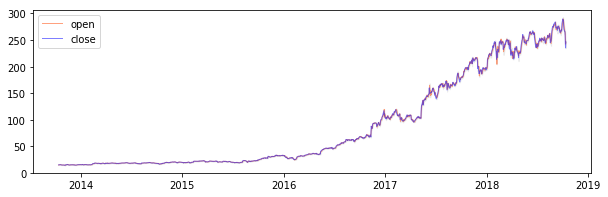

--- Missing: 45


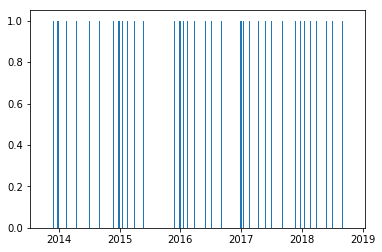

--- Last 6 M:


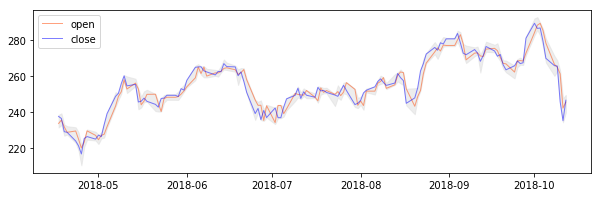

In [19]:
data_nvda = etl('../data_src/nvda.csv', '../data_clean/nvda.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,3.97,63562310.0,3.87,4.05,3.850
2013-10-15,4.02,51935420.0,4.03,4.10,4.010
2013-10-16,4.09,34002480.0,4.10,4.10,4.025
2013-10-17,4.09,44369980.0,4.12,4.13,4.060
2013-10-18,3.53,108447900.0,3.56,3.66,3.510


,close,volume,open,high,low
datetime,,,,,
2018-10-08,26.46,103591300.0,26.73,27.5400,25.96
2018-10-09,27.24,105135000.0,26.15,27.7100,26.00
2018-10-10,25.00,146250000.0,27.38,27.4000,24.91
2018-10-11,25.30,146516800.0,24.74,26.2000,24.55
2018-10-12,26.34,110862700.0,26.77,26.9697,25.67


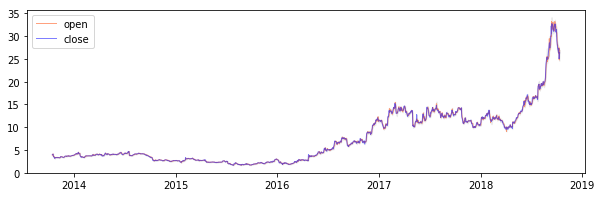

--- Missing: 45


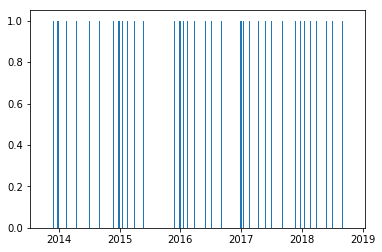

--- Last 6 M:


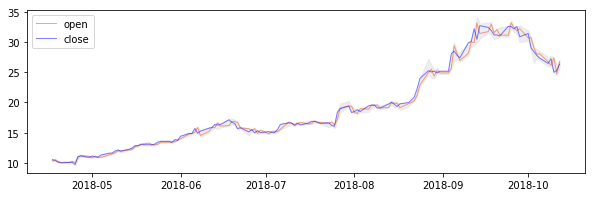

In [22]:
data_amd = etl('../data_src/amd.csv', '../data_clean/amd.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,29.38,87652.0,29.07,29.5100,28.6900
2013-10-15,29.41,179528.0,29.21,29.7099,28.9807
2013-10-16,29.33,470326.0,29.63,30.4500,28.8600
2013-10-17,25.83,2565001.0,26.64,27.2900,24.0000
2013-10-18,26.07,564796.0,26.10,27.1400,25.7200


,close,volume,open,high,low
datetime,,,,,
2018-10-08,26.37,1094936.0,26.79,27.17,25.5302
2018-10-09,26.84,966089.0,26.25,27.39,25.8200
2018-10-10,25.63,1386256.0,26.41,26.57,25.5350
2018-10-11,24.86,1809443.0,25.15,25.89,24.1400
2018-10-12,26.40,1250256.0,25.38,26.44,24.7700


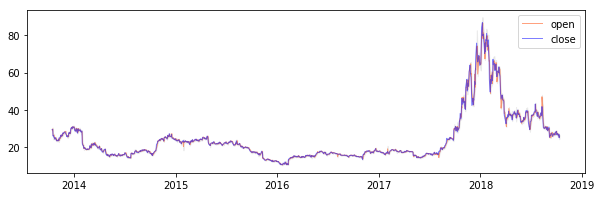

--- Missing: 45


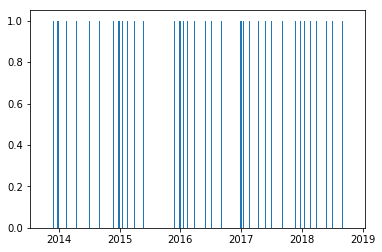

--- Last 6 M:


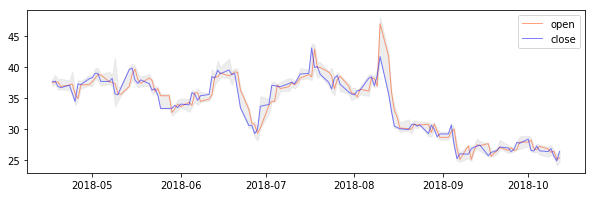

In [23]:
data_ostk = etl('../data_src/ostk.csv', '../data_clean/ostk.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,14.7200,38163.0,14.96,14.96,14.56
2013-10-15,14.6400,46117.0,14.64,15.12,14.64
2013-10-16,15.1200,39505.0,14.80,15.60,14.56
2013-10-17,15.8392,86175.0,15.28,16.00,15.20
2013-10-18,15.6800,51802.0,15.92,16.16,15.44


,close,volume,open,high,low
datetime,,,,,
2018-10-08,2.85,359386.0,3.02,3.1170,2.83
2018-10-09,2.71,348771.0,2.85,2.8835,2.67
2018-10-10,2.17,915036.0,2.72,2.7300,2.15
2018-10-11,2.16,662046.0,2.15,2.3204,2.15
2018-10-12,2.57,4981702.0,2.22,3.1100,2.22


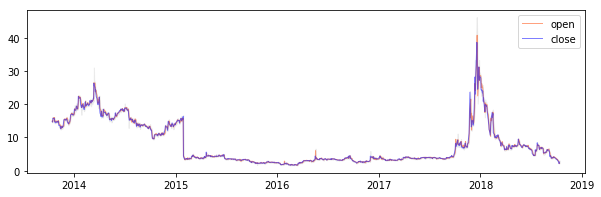

--- Missing: 45


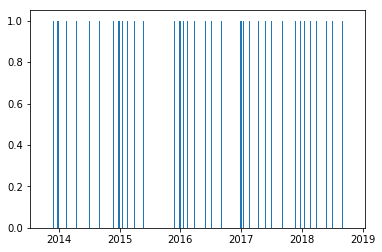

--- Last 6 M:


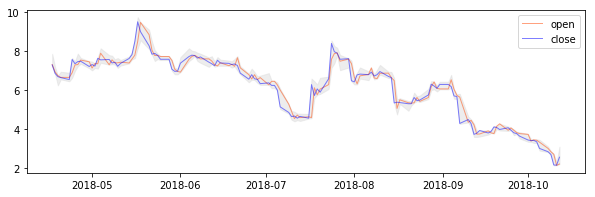

In [24]:
data_riot = etl('../data_src/riot.csv', '../data_clean/riot.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2015-02-27,0.2088,0.0,0.2088,0.2088,0.2088
2015-03-02,0.2088,0.0,0.2088,0.2088,0.2088
2015-03-03,0.2088,0.0,0.2088,0.2088,0.2088
2015-03-04,0.2088,0.0,0.2088,0.2088,0.2088
2015-03-05,0.2088,0.0,0.2088,0.2088,0.2088


,close,volume,open,high,low
datetime,,,,,
2018-10-08,7.880,1449013.0,7.300,7.91,7.30
2018-10-09,7.725,852224.0,7.820,7.90,7.51
2018-10-10,7.310,1375187.0,7.650,7.65,7.25
2018-10-11,6.780,2474177.0,6.990,6.99,6.75
2018-10-12,6.850,1168809.0,6.865,6.99,6.78


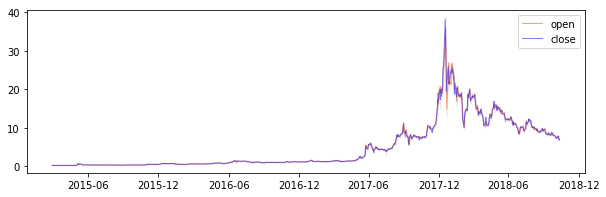

--- Missing: 31


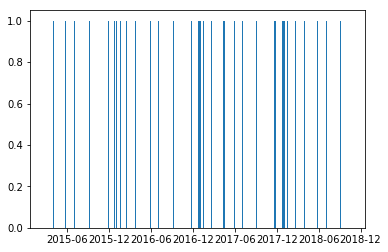

--- Last 6 M:


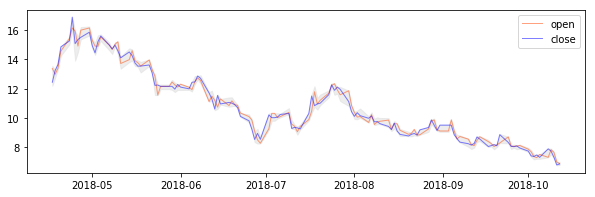

In [25]:
data_gbtc = etl('../data_src/gbtc.csv', '../data_clean/gbtc.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,9.56,4342.0,9.9,10.10,9.5
2013-10-15,9.58,542.0,9.5,9.58,9.4
2013-10-16,9.20,2022.0,9.3,9.38,9.2
2013-10-17,10.60,17128.0,9.0,11.70,9.0
2013-10-18,11.46,32681.0,10.1,11.46,10.1


,close,volume,open,high,low
datetime,,,,,
2018-10-08,0.7100,461242.0,0.698,0.719,0.6676
2018-10-09,0.6700,413108.0,0.700,0.700,0.6550
2018-10-10,0.6300,397095.0,0.660,0.681,0.6300
2018-10-11,0.5850,734764.0,0.630,0.630,0.5700
2018-10-12,0.6085,698911.0,0.600,0.678,0.5900


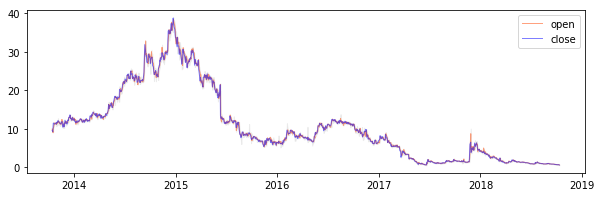

--- Missing: 45


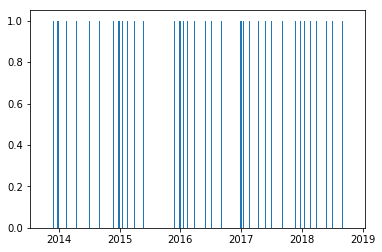

--- Last 6 M:


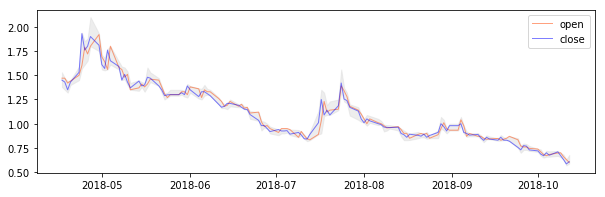

In [26]:
data_mara = etl('../data_src/mara.csv', '../data_clean/mara.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,1.55,47436.0,1.55,1.560,1.5500
2013-10-15,1.48,53841.0,1.52,1.551,1.4800
2013-10-16,1.53,141536.0,1.51,1.550,1.4999
2013-10-17,1.70,656381.0,1.55,1.720,1.5500
2013-10-18,1.80,206930.0,1.67,1.800,1.6500


,close,volume,open,high,low
datetime,,,,,
2018-10-08,0.9451,34628.0,0.9404,0.989,0.9257
2018-10-09,0.9330,54567.0,0.9700,0.980,0.9300
2018-10-10,0.9400,58607.0,0.9800,0.980,0.9100
2018-10-11,0.9112,74004.0,0.9400,0.940,0.8550
2018-10-12,0.9400,64730.0,0.9100,0.940,0.8860


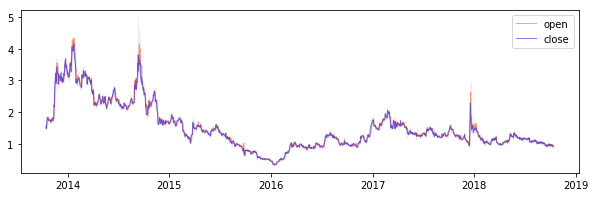

--- Missing: 45


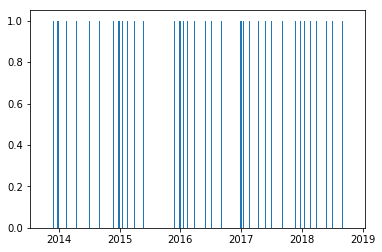

--- Last 6 M:


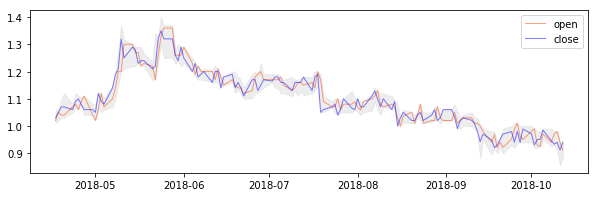

In [28]:
data_otiv = etl('../data_src/otiv.csv', '../data_clean/otiv.csv')

--- Summary:


,close,volume,open,high,low
datetime,,,,,
2013-10-14,1.64,3700.0,1.6500,1.6500,1.62
2013-10-15,1.64,0.0,1.6400,1.6400,1.64
2013-10-16,1.63,1115.0,1.6301,1.6301,1.61
2013-10-17,1.63,2300.0,1.6300,1.6300,1.61
2013-10-18,1.63,0.0,1.6300,1.6300,1.63


,close,volume,open,high,low
datetime,,,,,
2018-10-08,13.72,4478.0,13.86,14.27,13.7074
2018-10-09,13.47,12193.0,13.59,13.82,13.3899
2018-10-10,13.04,9374.0,13.51,13.88,13.0300
2018-10-11,12.96,10389.0,13.00,13.46,12.9500
2018-10-12,13.09,10455.0,13.27,13.87,13.0200


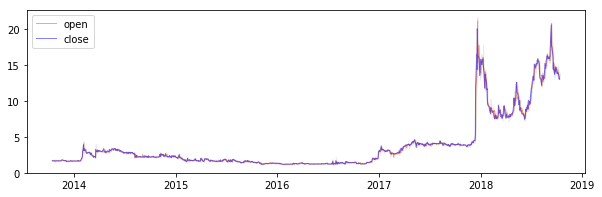

--- Missing: 45


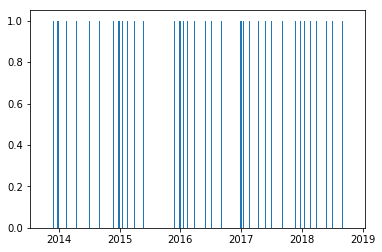

--- Last 6 M:


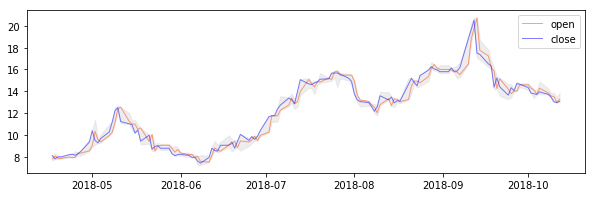

In [29]:
data_sieb = etl('../data_src/sieb.csv', '../data_clean/sieb.csv')